In [1]:
import pandas as pd
import numpy as np
import time
import math as math
from math import sqrt

#sklearn for models
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
from sklearn.impute import SimpleImputer
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegressionCV
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from lightgbm import LGBMClassifier
import scipy.stats as stats


# matplotlib and seaborn for plotting
import matplotlib.pyplot as plt
import seaborn as sns

#filter warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Importation Tables
application_test = pd.read_csv("application_test.csv", sep = ",")
application_train = pd.read_csv("application_train.csv", sep = ",")
bureau = pd.read_csv("bureau.csv", sep = ",")
bureau_balance = pd.read_csv("bureau_balance.csv", sep = ",")
credit_card_balance = pd.read_csv("credit_card_balance.csv", sep = ",")
#HomeCredit_columns_description = pd.read_csv("HomeCredit_columns_description;.csv", sep = ";")
installments_payments = pd.read_csv("installments_payments.csv", sep = ",")
POS_CASH_balance = pd.read_csv("POS_CASH_balance.csv", sep = ",")
previous_application = pd.read_csv("previous_application.csv", sep = ",")
sample_submission = pd.read_csv("sample_submission.csv", sep = ",")


#increase the maximum number of columns to display
pd.set_option("display.max_columns", 1000)  # Maximum number of columns

## Data Scheme

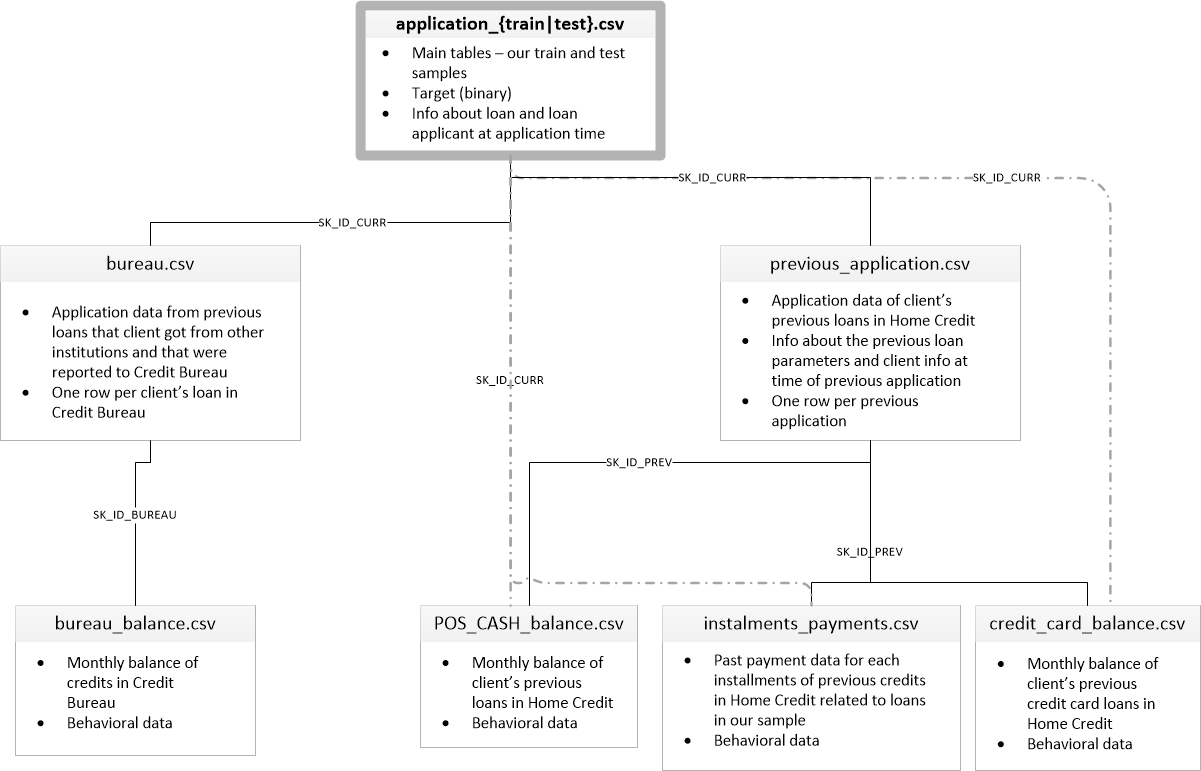

In [3]:
# Tables sizes

tables = [
application_test, application_train, bureau, bureau_balance, credit_card_balance,
installments_payments, POS_CASH_balance, previous_application, sample_submission]

for i in tables:
    print(i.shape)

(48744, 121)
(307511, 122)
(1716428, 17)
(27299925, 3)
(3840312, 23)
(13605401, 8)
(10001358, 8)
(1670214, 37)
(48744, 2)


In [4]:
application_test.head()   

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100001,Cash loans,F,N,Y,0,135000.0,568800.0,20560.5,450000.0,Unaccompanied,Working,Higher education,Married,House / apartment,0.018850,-19241,-2329,-5170.0,-812,NaN,1,1,0,1,0,1,NaN,2.0,2,2,TUESDAY,18,0,0,0,0,0,0,Kindergarten,0.752614,0.789654,0.159520,0.0660,0.0590,0.9732,NaN,NaN,NaN,0.1379,0.125,NaN,NaN,NaN,0.0505,NaN,NaN,0.0672,0.0612,0.9732,NaN,NaN,NaN,0.1379,0.125,NaN,NaN,NaN,0.0526,NaN,NaN,0.0666,0.0590,0.9732,NaN,NaN,NaN,0.1379,0.125,NaN,NaN,NaN,0.0514,NaN,NaN,NaN,block of flats,0.0392,"Stone, brick",No,0.0,0.0,0.0,0.0,-1740.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,100005,Cash loans,M,N,Y,0,99000.0,222768.0,17370.0,180000.0,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,0.035792,-18064,-4469,-9118.0,-1623,NaN,1,1,0,1,0,0,Low-skill Laborers,2.0,2,2,FRIDAY,9,0,0,0,0,0,0,Self-employed,0.564990,0.291656,0.432962,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
2,100013,Cash loans,M,Y,Y,0,202500.0,663264.0,69777.0,630000.0,NaN,Working,Higher education,Married,House / apartment,0.019101,-20038,-4458,-2175.0,-3503,5.0,1,1,0,1,0,0,Drivers,2.0,2,2,MONDAY,14,0,0,0,0,0,0,Transport: type 3,NaN,0.699787,0.610991,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-856.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,1.0,4.0
3,100028,Cash loans,F,N,Y,2,315000.0,1575000.0,49018.5,1575000.0,Unaccompanied,Working,Secondary / secondary special,Married

In [5]:
application_train.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [6]:
bureau.head()

,SK_ID_CURR,SK_ID_BUREAU,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE,AMT_ANNUITY
0,215354,5714462,Closed,currency 1,-497,0,-153.0,-153.0,NaN,0,91323.0,0.0,NaN,0.0,Consumer credit,-131,NaN
1,215354,5714463,Active,currency 1,-208,0,1075.0,NaN,NaN,0,225000.0,171342.0,NaN,0.0,Credit card,-20,NaN
2,215354,5714464,Active,currency 1,-203,0,528.0,NaN,NaN,0,464323.5,NaN,NaN,0.0,Consumer credit,-16,NaN
3,215354,5714465,Active,currency 1,-203,0,NaN,NaN,NaN,0,90000.0,NaN,NaN,0.0,Credit card,-16,NaN
4,215354,5714466,Active,currency 1,-629,0,1197.0,NaN,77674.5,0,2700000.0,NaN,NaN,0.0,Consumer credit,-21,NaN


In [7]:
bureau_balance.head()

,SK_ID_BUREAU,MONTHS_BALANCE,STATUS
0,5715448,0,C
1,5715448,-1,C
2,5715448,-2,C
3,5715448,-3,C
4,5715448,-4,C


In [8]:
credit_card_balance.head()

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,AMT_BALANCE,AMT_CREDIT_LIMIT_ACTUAL,AMT_DRAWINGS_ATM_CURRENT,AMT_DRAWINGS_CURRENT,AMT_DRAWINGS_OTHER_CURRENT,AMT_DRAWINGS_POS_CURRENT,AMT_INST_MIN_REGULARITY,AMT_PAYMENT_CURRENT,AMT_PAYMENT_TOTAL_CURRENT,AMT_RECEIVABLE_PRINCIPAL,AMT_RECIVABLE,AMT_TOTAL_RECEIVABLE,CNT_DRAWINGS_ATM_CURRENT,CNT_DRAWINGS_CURRENT,CNT_DRAWINGS_OTHER_CURRENT,CNT_DRAWINGS_POS_CURRENT,CNT_INSTALMENT_MATURE_CUM,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
0,2562384,378907,-6,56.970,135000,0.0,877.5,0.0,877.5,1700.325,1800.0,1800.0,0.000,0.000,0.000,0.0,1,0.0,1.0,35.0,Active,0,0
1,2582071,363914,-1,63975.555,45000,2250.0,2250.0,0.0,0.0,2250.000,2250.0,2250.0,60175.080,64875.555,64875.555,1.0,1,0.0,0.0,69.0,Active,0,0
2,1740877,371185,-7,31815.225,450000,0.0,0.0,0.0,0.0,2250.000,2250.0,2250.0,26926.425,31460.085,31460.085,0.0,0,0.0,0.0,30.0,Active,0,0
3,1389973,337855,-4,236572.110,225000,2250.0,2250.0,0.0,0.0,11795.760,11925.0,11925.0,224949.285,233048.970,233048.970,1.0,1,0.0,0.0,10.0,Active,0,0
4,1891521,126868,-1,453919.455,450000,0.0,11547.0,0.0,11547.0,22924.890,27000.0,27000.0,443044.395,453919.455,453919.455,0.0,1,0.0,1.0,101.0,Active,0,0


In [9]:
installments_payments.head()

,SK_ID_PREV,SK_ID_CURR,NUM_INSTALMENT_VERSION,NUM_INSTALMENT_NUMBER,DAYS_INSTALMENT,DAYS_ENTRY_PAYMENT,AMT_INSTALMENT,AMT_PAYMENT
0,1054186,161674,1.0,6,-1180.0,-1187.0,6948.360,6948.360
1,1330831,151639,0.0,34,-2156.0,-2156.0,1716.525,1716.525
2,2085231,193053,2.0,1,-63.0,-63.0,25425.000,25425.000
3,2452527,199697,1.0,3,-2418.0,-2426.0,24350.130,24350.130
4,2714724,167756,1.0,2,-1383.0,-1366.0,2165.040,2160.585


In [10]:
POS_CASH_balance.head()

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,CNT_INSTALMENT,CNT_INSTALMENT_FUTURE,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
0,1803195,182943,-31,48.0,45.0,Active,0,0
1,1715348,367990,-33,36.0,35.0,Active,0,0
2,1784872,397406,-32,12.0,9.0,Active,0,0
3,1903291,269225,-35,48.0,42.0,Active,0,0
4,2341044,334279,-35,36.0,35.0,Active,0,0


In [11]:
previous_application.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,Y,1,0.0,0.182832,0.867336,XAP,Approved,-73,Cash through the bank,XAP,NaN,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-164,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-301,Cash through the bank,XAP,"Spouse, partner",Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,Y,1,NaN,NaN,NaN,XNA,Approved,-512,Cash through the bank,XAP,NaN,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,Y,1,NaN,NaN,NaN,Repairs,Refused,-781,Cash through the bank,HC,NaN,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
sample_submission.head()

,SK_ID_CURR,TARGET
0,100001,0.5
1,100005,0.5
2,100013,0.5
3,100028,0.5
4,100038,0.5


In [13]:
# application_train = application_train.merge(bureau, how = 'left', on = 'SK_ID_CURR')
# application_train.shape

In [14]:
# application_train = application_train.merge(bureau_balance, how = 'left', on = 'SK_ID_BUREAU')
# application_train.shape

In [15]:
# application_train = application_train.merge(credit_card_balance, how = 'left', on = 'SK_ID_CURR')
# application_train.shape

In [16]:
# application_train = application_train.merge(installments_payments, how = 'left', on = 'SK_ID_CURR')
# application_train.shape

In [17]:
# application_train = application_train.merge(POS_CASH_balance, how = 'left', on = 'SK_ID_CURR')
# application_train.shape

In [18]:
# application_train = application_train.merge(previous_application, how = 'left', on = 'SK_ID_CURR')
# application_train.shape

In [19]:
# application_test = application_test.merge(bureau, how = 'left', on = 'SK_ID_CURR')
# application_test = application_test.merge(bureau_balance, how = 'left', on = 'SK_ID_BUREAU')
# application_test = application_test.merge(credit_card_balance, how = 'left', on = 'SK_ID_CURR')
# application_test = application_test.merge(installments_payments, how = 'left', on = 'SK_ID_CURR')
# application_test = application_test.merge(POS_CASH_balance, how = 'left', on = 'SK_ID_CURR')
# application_test = application_test.merge(previous_application, how = 'left', on = 'SK_ID_CURR')
# application_test.shape

# Analyse Exploratoire

In [20]:
#check de l'unicité de l'ID client

sum(application_train['SK_ID_CURR'].value_counts())/len(application_train)

#On a bien chaque ligne = 1 ID 

1.0

0    282686
1     24825
Name: TARGET, dtype: int64


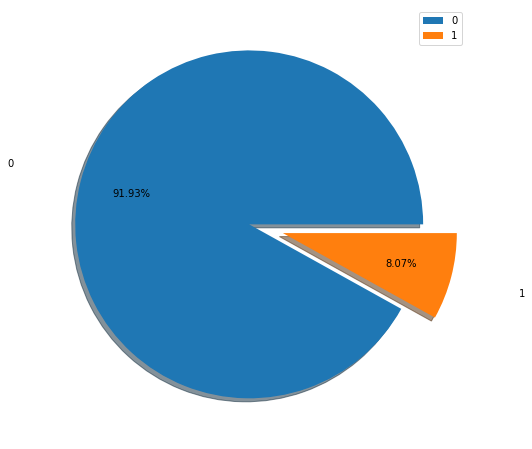

In [21]:
print(application_train['TARGET'].value_counts())

plt.figure(figsize = (8, 8))
x = [1, 2, 3, 4, 10]
plt.pie(application_train['TARGET'].value_counts(), labels = ["0", "1"],
           explode = [0, 0.2],
           autopct = lambda x: str(round(x, 2)) + '%',
           pctdistance = 0.7, labeldistance = 1.4,
           shadow = True)
plt.legend()

In [22]:
application_train['CNT_CHILDREN'].describe()
#ça semble ok

count    307511.000000
mean          0.417052
std           0.722121
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max          19.000000
Name: CNT_CHILDREN, dtype: float64

## Gestion des variables non-numériques

In [23]:
application_train.dtypes.value_counts()

float64    65
int64      41
object     16
dtype: int64

In [24]:
col_feature_eng = []

for i in application_train.columns:
    if application_train[i].dtype == 'object':
        col_feature_eng.append(i)
        
for i in col_feature_eng:
    print(i)
    print(application_train[i].value_counts())
    print()

NAME_CONTRACT_TYPE
Cash loans         278232
Revolving loans     29279
Name: NAME_CONTRACT_TYPE, dtype: int64

CODE_GENDER
F      202448
M      105059
XNA         4
Name: CODE_GENDER, dtype: int64

FLAG_OWN_CAR
N    202924
Y    104587
Name: FLAG_OWN_CAR, dtype: int64

FLAG_OWN_REALTY
Y    213312
N     94199
Name: FLAG_OWN_REALTY, dtype: int64

NAME_TYPE_SUITE
Unaccompanied      248526
Family              40149
Spouse, partner     11370
Children             3267
Other_B              1770
Other_A               866
Group of people       271
Name: NAME_TYPE_SUITE, dtype: int64

NAME_INCOME_TYPE
Working                 158774
Commercial associate     71617
Pensioner                55362
State servant            21703
Unemployed                  22
Student                     18
Businessman                 10
Maternity leave              5
Name: NAME_INCOME_TYPE, dtype: int64

NAME_EDUCATION_TYPE
Secondary / secondary special    218391
Higher education                  74863
Incomplete highe

<BarContainer object of 58 artists>

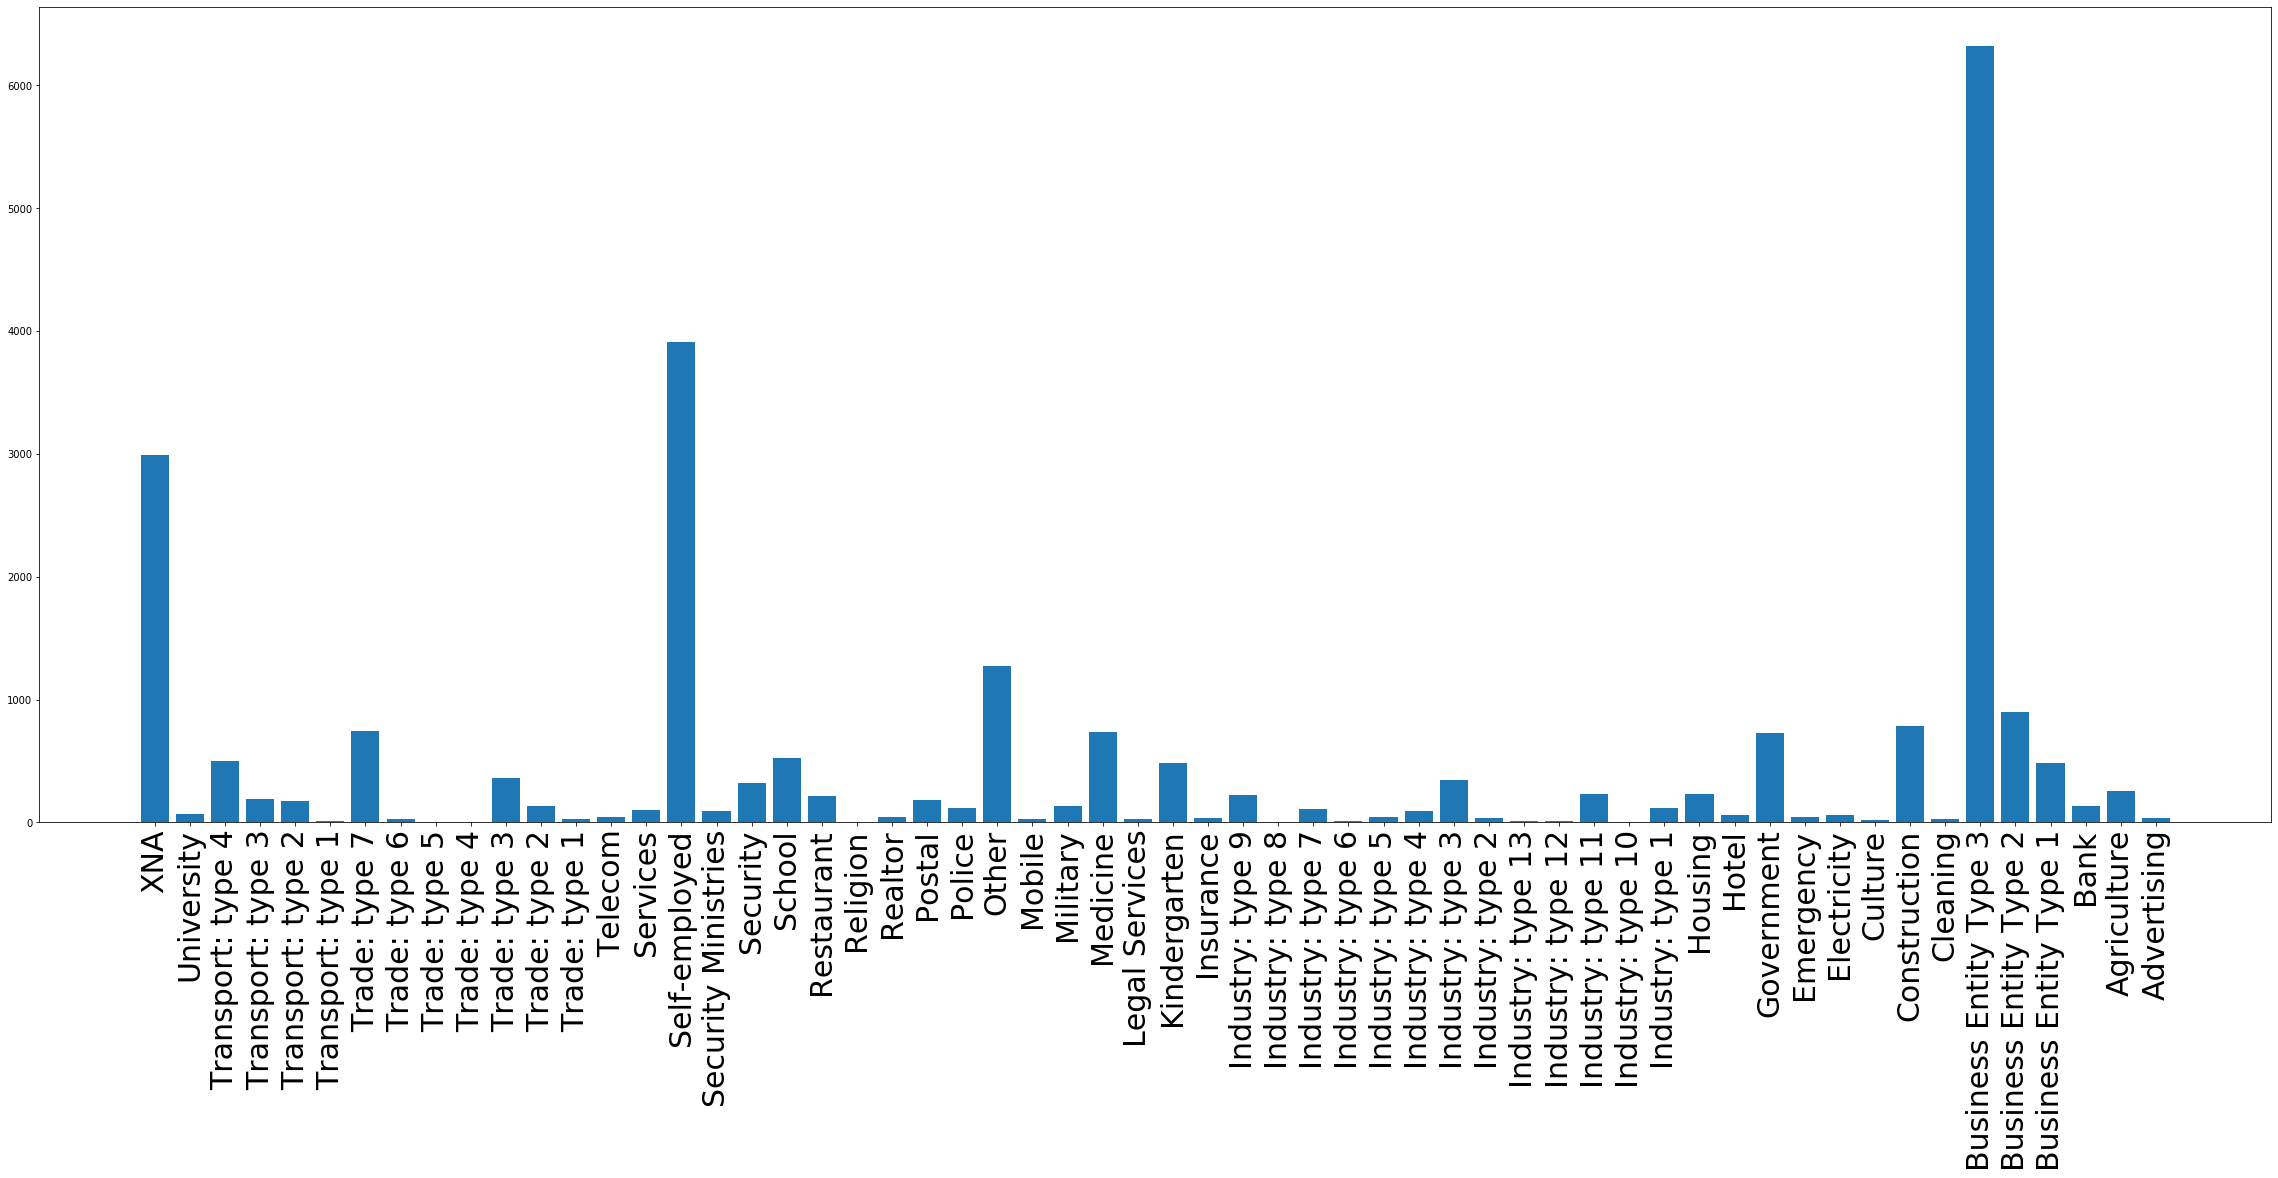

In [25]:
check = ['ORGANIZATION_TYPE', 'TARGET']

df = application_train[check]
df_1 = df[df['TARGET']==1]
# df_0 = df[df['TARGET']==0]

volume = df_1['ORGANIZATION_TYPE'].value_counts()
mode = volume.index
tab = pd.DataFrame(mode, columns = ['ORGANIZATION_TYPE'])
tab["volume"] = volume.values
tab["freq"] = tab["volume"] /len(df_1)
freq_tab = tab.sort_values(by = 'ORGANIZATION_TYPE', ascending = False )

plt.figure(figsize=(40, 15))
plt.xticks(fontsize=30, rotation='vertical')
plt.bar(freq_tab['ORGANIZATION_TYPE'], freq_tab["volume"])

In [26]:
# DAYS BIRTH = calculé en jours depuis la date de prêt, on va switcher en année 

In [27]:
application_train['DAYS_BIRTH'].value_counts()

-13749    43
-13481    42
-18248    41
-10020    41
-15771    40
          ..
-25032     1
-7956      1
-8001      1
-7861      1
-24894     1
Name: DAYS_BIRTH, Length: 17460, dtype: int64

In [28]:
application_test['DAYS_BIRTH']

0       -19241
1       -18064
2       -20038
3       -13976
4       -13040
         ...  
48739   -19970
48740   -11186
48741   -15922
48742   -13968
48743   -13962
Name: DAYS_BIRTH, Length: 48744, dtype: int64

In [29]:
application_train['DAYS_BIRTH'] = application_train['DAYS_BIRTH']/-365
application_test['DAYS_BIRTH'] = application_test['DAYS_BIRTH']/-365

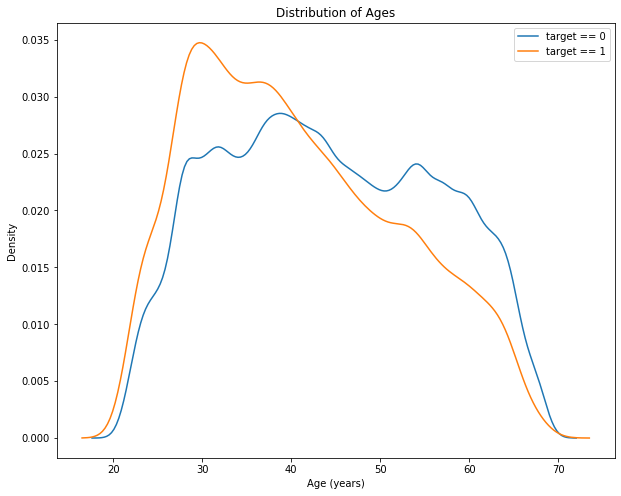

In [30]:
plt.figure(figsize = (10, 8))

# KDE plot of loans that were repaid on time
sns.kdeplot(application_train.loc[application_train['TARGET'] == 0, 'DAYS_BIRTH'], label = 'target == 0')

# KDE plot of loans which were not repaid on time
sns.kdeplot(application_train.loc[application_train['TARGET'] == 1, 'DAYS_BIRTH'], label = 'target == 1')

# Labeling of plot
plt.xlabel('Age (years)'); plt.ylabel('Density'); plt.title('Distribution of Ages'); plt.legend()

In [31]:
# DAYS EMPLOYED => un outlier (365243)

In [32]:
application_train['DAYS_EMPLOYED'].value_counts()

 365243    55374
-200         156
-224         152
-199         151
-230         151
           ...  
-11115         1
-11371         1
-11883         1
-13536         1
-8795          1
Name: DAYS_EMPLOYED, Length: 12574, dtype: int64

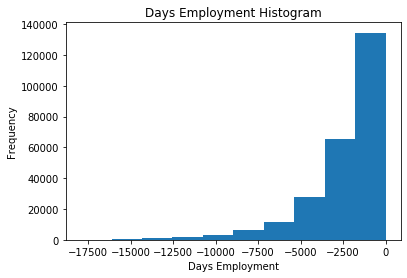

In [33]:
# Create an anomalous flag column
application_train['DAYS_EMPLOYED_ANOM'] = application_train["DAYS_EMPLOYED"] == 365243

# Replace the anomalous values with nan
application_train['DAYS_EMPLOYED'].replace({365243: np.nan}, inplace = True)

application_train['DAYS_EMPLOYED'].plot.hist(title = 'Days Employment Histogram');
plt.xlabel('Days Employment');

In [34]:
application_test['DAYS_EMPLOYED_ANOM'] = application_test["DAYS_EMPLOYED"] == 365243
application_test["DAYS_EMPLOYED"].replace({365243: np.nan}, inplace = True)

In [35]:
application_train["DAYS_EMPLOYED"] = application_train["DAYS_EMPLOYED"]/-365
application_test["DAYS_EMPLOYED"] = application_test["DAYS_EMPLOYED"]/-365

In [36]:
application_test['DAYS_ID_PUBLISH'].value_counts()

-4557    40
-4255    39
-4291    35
-4277    32
-4592    32
         ..
-5161     1
-6346     1
-5823     1
-5887     1
-6115     1
Name: DAYS_ID_PUBLISH, Length: 5880, dtype: int64

In [37]:
application_train['DAYS_ID_PUBLISH'] = application_train['DAYS_ID_PUBLISH']/-365
application_test['DAYS_ID_PUBLISH'] = application_test['DAYS_ID_PUBLISH']/-365

In [38]:
application_train['OWN_CAR_AGE'].value_counts()

7.0     7424
6.0     6382
3.0     6370
8.0     5887
2.0     5852
        ... 
52.0       1
56.0       1
47.0       1
50.0       1
57.0       1
Name: OWN_CAR_AGE, Length: 62, dtype: int64

## Encodage des colonnes non-numériques

In [39]:
le = LabelEncoder()
le_count = 0

# Iterate through the columns
for col in col_feature_eng:
    if application_train[col].dtype == 'object':
        # If 2 or fewer unique categories
        if len(list(application_train[col].unique())) <= 2:
            # Train on the training data
            le.fit(application_train[col])
            # Transform both training and testing data
            application_train[col] = le.transform(application_train[col])
            application_test[col] = le.transform(application_test[col])
            
            # Keep track of how many columns were label encoded
            le_count += 1
            
print('%d columns were label encoded.' % le_count)

3 columns were label encoded.


In [40]:
application_train = pd.get_dummies(application_train)
application_test = pd.get_dummies(application_test)

print('Training Features shape: ', application_train.shape)
print('Testing Features shape: ', application_test.shape)

Training Features shape:  (307511, 244)
Testing Features shape:  (48744, 240)


In [41]:
train_labels = application_train['TARGET']

# Align the training and testing data, keep only columns present in both dataframes
application_train, application_test = application_train.align(application_test, join = 'inner', axis = 1)

# Add the target back in
application_train['TARGET'] = train_labels

print('Training Features shape: ', application_train.shape)
print('Testing Features shape: ', application_test.shape)

Training Features shape:  (307511, 241)
Testing Features shape:  (48744, 240)


## Vérification de la corrélation

In [42]:
# Find correlations with the target and sort
correlations = application_train.corr()['TARGET'].sort_values()

# Display correlations
print('Most Positive Correlations:\n', correlations.tail(15))
print('\nMost Negative Correlations:\n', correlations.head(15))

Most Positive Correlations:
 LIVE_CITY_NOT_WORK_CITY                              0.032518
OWN_CAR_AGE                                          0.037612
DAYS_REGISTRATION                                    0.041975
OCCUPATION_TYPE_Laborers                             0.043019
FLAG_DOCUMENT_3                                      0.044346
REG_CITY_NOT_LIVE_CITY                               0.044395
FLAG_EMP_PHONE                                       0.045982
NAME_EDUCATION_TYPE_Secondary / secondary special    0.049824
REG_CITY_NOT_WORK_CITY                               0.050994
CODE_GENDER_M                                        0.054713
DAYS_LAST_PHONE_CHANGE                               0.055218
NAME_INCOME_TYPE_Working                             0.057481
REGION_RATING_CLIENT                                 0.058899
REGION_RATING_CLIENT_W_CITY                          0.060893
TARGET                                               1.000000
Name: TARGET, dtype: float64

Most Negati

##### Aucune variable ne semble suffisamment corrélée pour que l'on ait à la retirer

## Valeur Manquantes

In [43]:
def missing_values_table(df):
        # Total missing values
        mis_val = df.isnull().sum()
        
        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(2)
        
        # Print some summary information
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        
        # Return the dataframe with missing information
        return mis_val_table_ren_columns

In [44]:
# Missing values statistics
missing_values = missing_values_table(application_train)
missing_values.sort_values('% of Total Values', ascending = False).head(25)

Your selected dataframe has 241 columns.
There are 62 columns that have missing values.


,Missing Values,% of Total Values
COMMONAREA_MODE,214865,69.87
COMMONAREA_MEDI,214865,69.87
COMMONAREA_AVG,214865,69.87
NONLIVINGAPARTMENTS_MEDI,213514,69.43
NONLIVINGAPARTMENTS_AVG,213514,69.43
NONLIVINGAPARTMENTS_MODE,213514,69.43
LIVINGAPARTMENTS_MODE,210199,68.35
LIVINGAPARTMENTS_MEDI,210199,68.35
LIVINGAPARTMENTS_AVG,210199,68.35
FLOORSMIN_MODE,208642,67.85


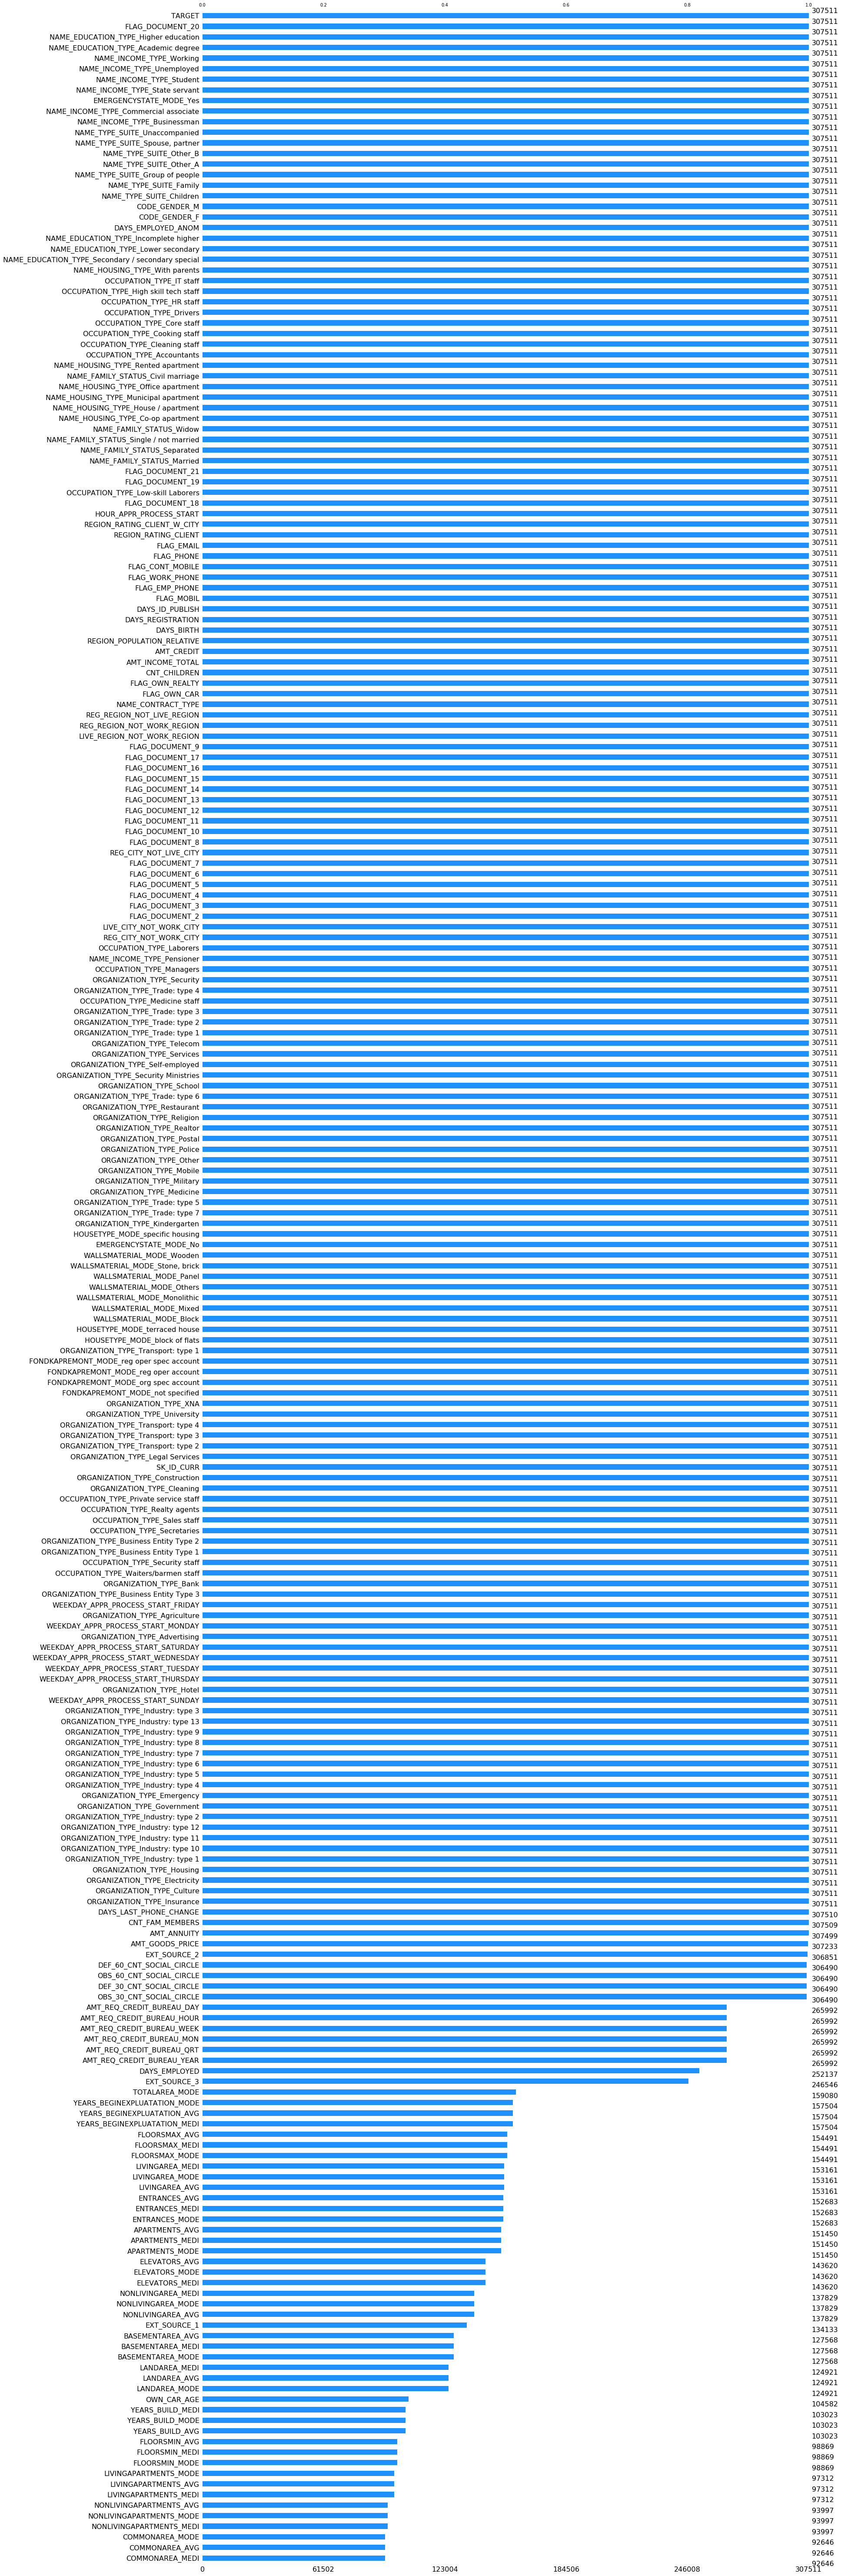

In [45]:
import missingno as msgno

msgno.bar(application_train,color="dodgerblue", sort="ascending")

## filtrer col avec 90% de missing values

In [46]:
def col_dropping(df, threshold=0.9):
    missing_values= missing_values_table(df)
    empty_col = missing_values.index[missing_values['% of Total Values'] > threshold]
    
    for i in empty_col:
        df.drop(i, axis = 1)

In [47]:
col_dropping(application_train, threshold=0.9)
col_dropping(application_test, threshold=0.9)

Your selected dataframe has 241 columns.
There are 62 columns that have missing values.
Your selected dataframe has 240 columns.
There are 59 columns that have missing values.


# Preparation pour le modèle

In [48]:
# Indexing on SK_ID_CURR, both for train and test sets

application_train = application_train.set_index('SK_ID_CURR')
application_test = application_test.set_index('SK_ID_CURR')

In [49]:
#on va construire un jeu de donnée avec autant de target = 0 que de 1

volume_target_1 = application_train['TARGET'].value_counts().iloc[1]

app_train1 = application_train[application_train['TARGET']==1]
app_train0 = application_train[application_train['TARGET']==0].sample(volume_target_1)

app_train = pd.concat([app_train0, app_train1])
app_train

app_train['TARGET'].value_counts()

1    24825
0    24825
Name: TARGET, dtype: int64

In [50]:
X = app_train.drop('TARGET', axis = 1)
y = app_train['TARGET']

features = list(X.columns)

#Séparation train/test
(X_train, X_test, y_train, y_test) = train_test_split(X, y, test_size = 0.20)

print(X_train.shape)
print(X_test.shape)

(39720, 239)
(9930, 239)


### Imputation des valeurs manquantes avec la médiane

In [51]:
imp_mean = SimpleImputer(strategy='median')
imp_mean.fit_transform(X_train)

index_X_train = X_train.index
index_X_test = X_test.index

X_train = pd.DataFrame(imp_mean.transform(X_train), columns=features, index=index_X_train)
X_test = pd.DataFrame(imp_mean.transform(X_test), columns=features, index=index_X_test)

In [52]:
#Vérification que l'on a bien plus aucune valeur vide

X_train.isnull().sum().sum()+X_test.isnull().sum().sum()

0

In [53]:
# Centrage & réduction des data
X_train = preprocessing.StandardScaler().fit_transform(X_train)
X_test = preprocessing.StandardScaler().fit_transform(X_test)

In [54]:
#SAVE application_test en CSV

imp_mean.fit_transform(application_test)
index_app_test = application_test.index
index_app_test = application_test.index
application_test = pd.DataFrame(imp_mean.transform(application_test), columns=features, index=index_app_test)

#il faudra centrer & réduire à nouveau les data 

application_test.to_csv('app_test.csv')

# Test des modèles

##  Exemple de Decision Tree

[Ellipsis]

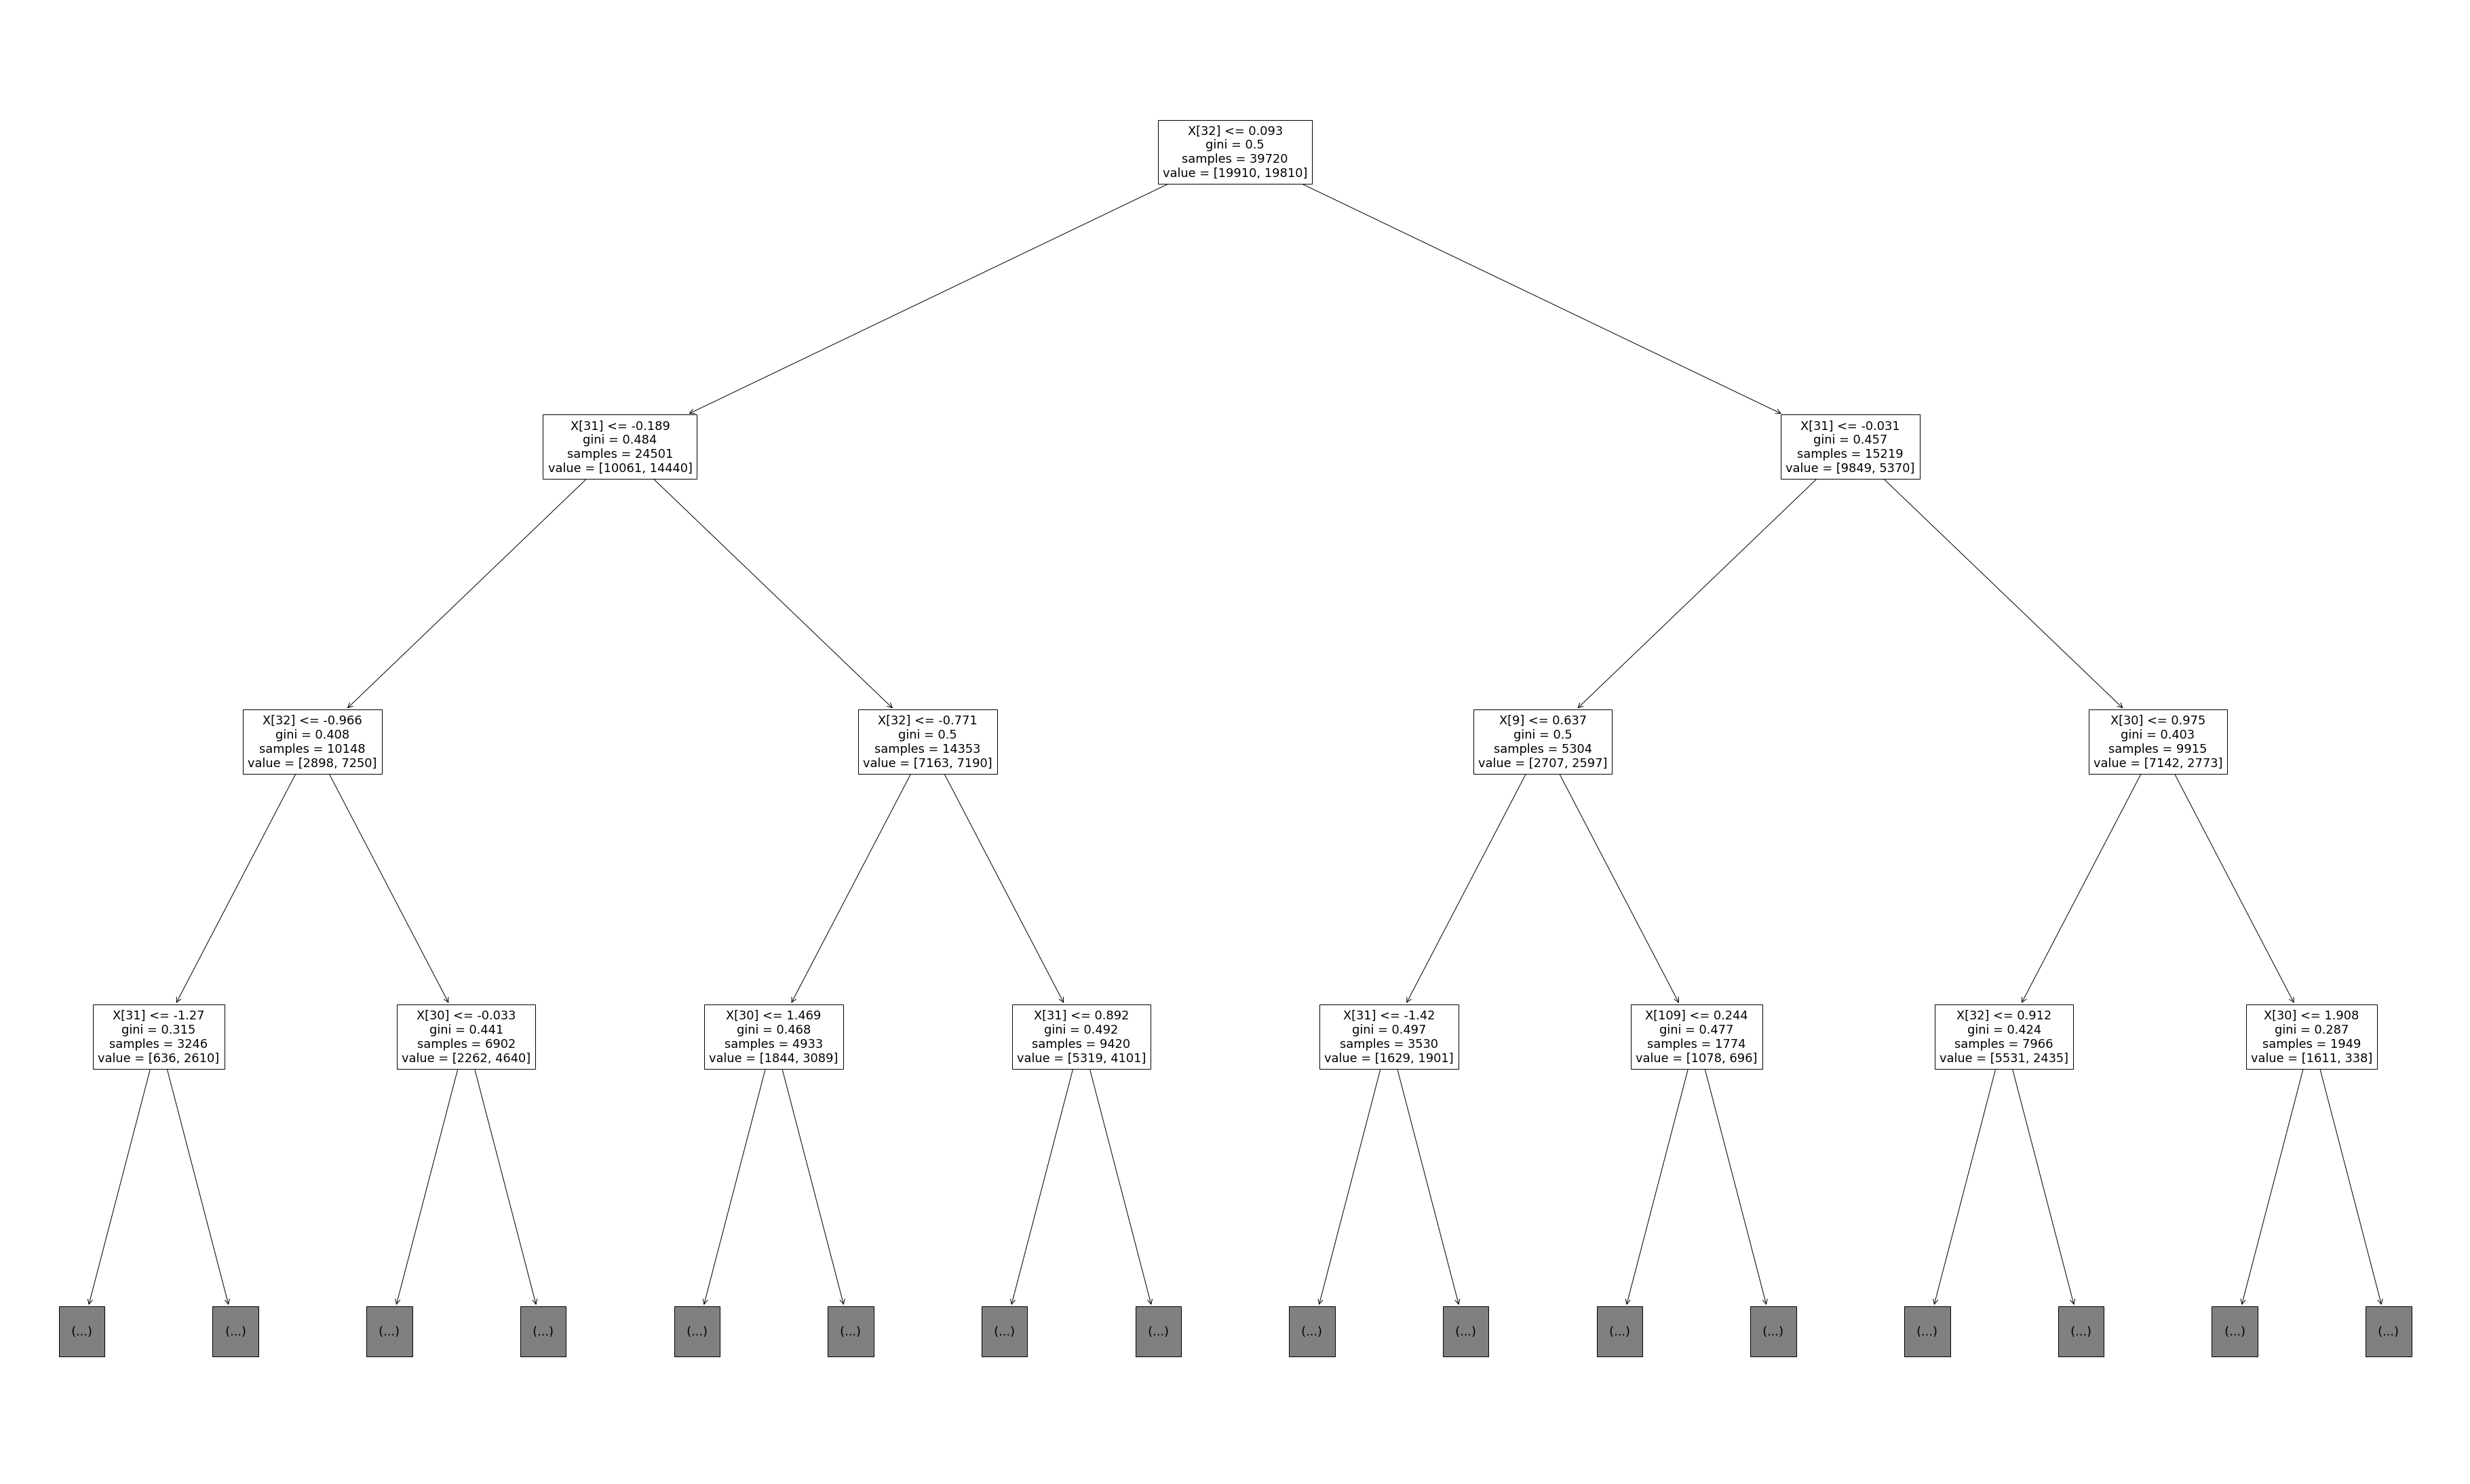

In [55]:
# PRINT les 3 premières branches 
clf = DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)

plt.figure(figsize=(65, 40))
plot_tree(clf, max_depth = 3)
[...]

## SET UP DU RANDOM FOREST

In [56]:
start_time = time.time()
rf = RandomForestClassifier(n_jobs=-1)

param_dist = {
            "n_estimators":[100,200],
            "criterion": ["gini"],
            "max_depth": [10,20,30,40,50,100,200,400],
            "max_features":[10,20,30,40,50,100,200,400],
            "bootstrap": [True, False]
            }

clf = RandomizedSearchCV( rf, 
                          param_distributions=param_dist,
                          n_iter=10,
                          cv=3,
                          scoring='roc_auc',
                          n_jobs=-1,
                          verbose=True,
                          random_state=13)

model_rf_roc = clf.fit(X_train, y_train)
grid_time = time.time() - start_time
print("time = %0.5f "% grid_time)
print(clf.best_params_)
rfr = clf.best_estimator_

Fitting 3 folds for each of 10 candidates, totalling 30 fits
time = 781.91758 
{'n_estimators': 100, 'max_features': 50, 'max_depth': 10, 'criterion': 'gini', 'bootstrap': False}


## SET UP DU BOOSTING

In [57]:
target1 = application_train[application_train['TARGET']==1]
target0 = application_train[application_train['TARGET']==0]

weight = len(app_train0)/len(app_train1)

lgbm = LGBMClassifier(max_depth=-1,
                      random_state=13,
                      silent=True,
                      metric='none',
                      n_jobs=-1,
                      n_estimators=200,
                      scale_pos_weight=weight)

lgbm_param = {'num_leaves': np.linspace(10, 80, 7, dtype='int'),
              'min_child_weight': [1e-5, 1e-2, 1, 1e2, 1e4],
              'subsample': stats.uniform(loc=0.2, scale=0.8),
              'colsample_bytree': stats.uniform(loc=0.4, scale=0.6),
              'reg_alpha': [0.1, 1,  10, 100],
              'reg_lambda': [0.1, 1, 10,  50, 100]}

grid_lgbm_roc = RandomizedSearchCV(lgbm,
                          lgbm_param,
                          n_iter=10,
                          cv=3,
                          scoring='roc_auc',
                          n_jobs=-1,
                          verbose=True,
                          random_state=13)


start_time = time.time()
model_lgbm_roc = grid_lgbm_roc.fit(X_train, y_train)
print(round(grid_lgbm_roc.best_score_, 3))
print(grid_lgbm_roc.best_params_)
grid_time = time.time() - start_time
print("time = %0.5f "% grid_time)
optima = pd.DataFrame(grid_lgbm_roc.cv_results_).T
optima
gb = grid_lgbm_roc.best_estimator_

Fitting 3 folds for each of 10 candidates, totalling 30 fits
0.754
{'colsample_bytree': 0.6085487290914952, 'min_child_weight': 100.0, 'num_leaves': 10, 'reg_alpha': 0.1, 'reg_lambda': 10, 'subsample': 0.9592753453425684}
time = 37.43820 


## Testing en série des modèles

In [58]:
trained_models = [] #  keep track of all details for models we train

def train_model(cle, valeur):
    start_time = time.time()
    valeur.fit(X_train, y_train)
    train_time = time.time() - start_time
    rmse= sqrt(mean_squared_error(y_test, valeur.predict(X_test)))
    train_accuracy =  valeur.score(X_train, y_train)
    test_accuracy = valeur.score(X_test, y_test)
    model_details = {"name": cle, "model": valeur, "RMSE":rmse, "train_accuracy":train_accuracy, 
                     "test_accuracy":test_accuracy, "train_time": train_time}
    return model_details

models = {"Naive Bayes": GaussianNB(),
          "logistic regression": LogisticRegressionCV(), 
          "Decision Tree": DecisionTreeClassifier(),
          "Random Forest": rfr,
          "GradientBoosting": gb}

In [59]:
for cle, valeur in models.items():
    model_details = train_model(cle, valeur)
    trained_models.append(model_details)
    print(cle)

Naive Bayes
logistic regression
Decision Tree
Random Forest
GradientBoosting


In [60]:
model_df = pd.DataFrame(trained_models)
model_df

,name,model,RMSE,train_accuracy,test_accuracy,train_time
0,Naive Bayes,GaussianNB(),0.710517,0.582528,0.495166,0.167325
1,logistic regression,LogisticRegressionCV(),0.563223,0.687664,0.682779,50.579105
2,Decision Tree,DecisionTreeClassifier(),0.652519,1.000000,0.574220,2.864732
3,Random Forest,"(DecisionTreeClassifier(max_depth=10, max_feat...",0.563849,0.769688,0.682075,9.089905
4,GradientBoosting,LGBMClassifier(colsample_bytree=0.608548729091...,0.559456,0.711455,0.687009,1.984198


<Figure size 1440x1440 with 0 Axes>

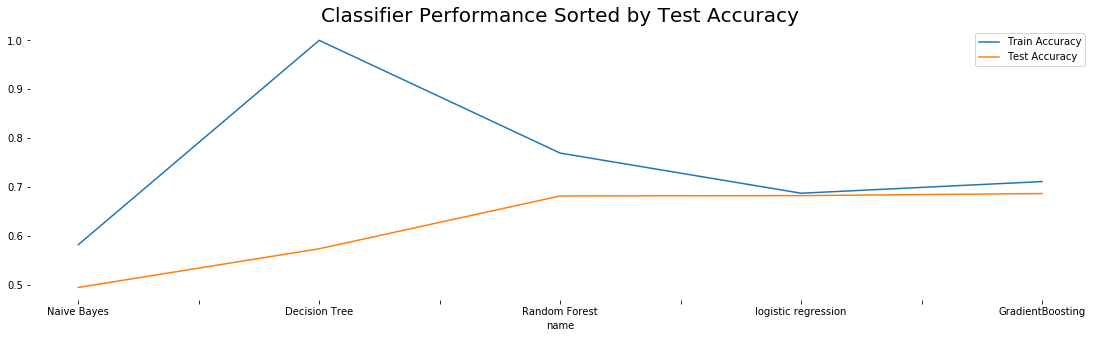

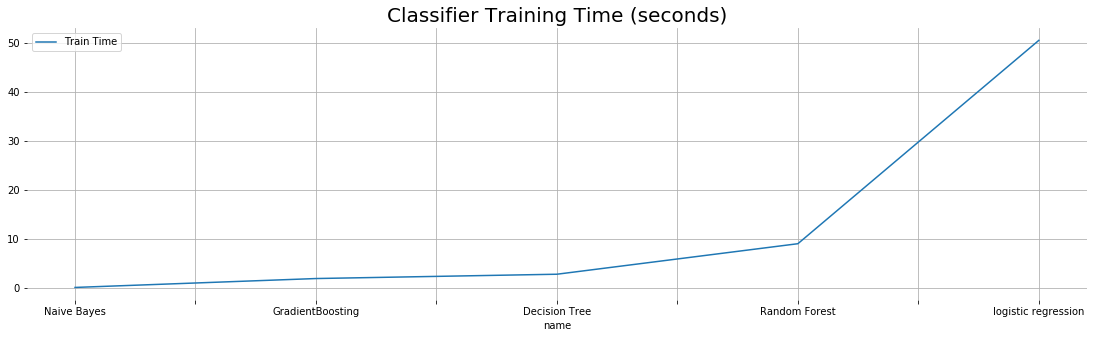

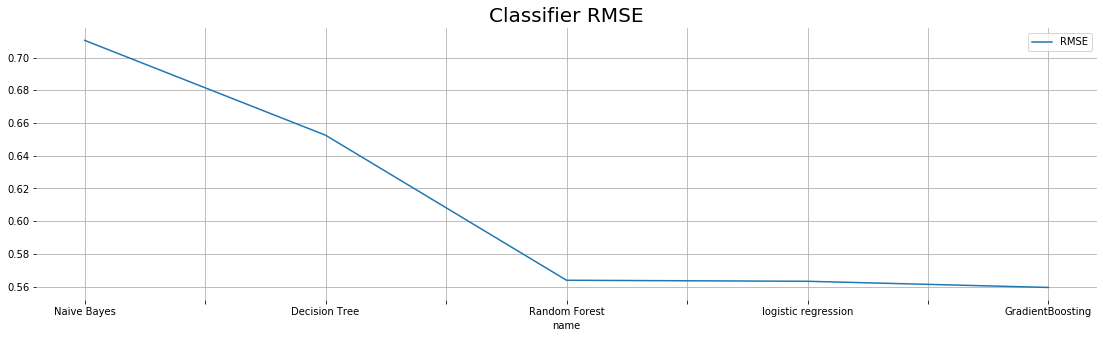

In [61]:
# visualize accuracy, run time & RMSE

plt.figure(figsize=(20,20))

model_df.sort_values("test_accuracy", inplace=True) 
ax = model_df[["train_accuracy","test_accuracy", "name"]].plot(kind="line", x="name", figsize=(19,5), title="Classifier Performance Sorted by Test Accuracy")
ax.legend(["Train Accuracy", "Test Accuracy"])
for p in ax.patches:
    ax.annotate( str( round(p.get_height(),3) ), (p.get_x() * 1.005, p.get_height() * 1.005))

ax.title.set_size(20)
plt.box(False)

model_df.sort_values("train_time", inplace=True)
ax= model_df[["train_time","name"]].plot(kind="line", x="name", figsize=(19,5), grid=True, title="Classifier Training Time (seconds)")
ax.title.set_size(20)
ax.legend(["Train Time"])
plt.box(False)  

model_df.sort_values("RMSE", inplace=True, ascending=False)
ax= model_df[["RMSE","name"]].plot(kind="line", x="name", figsize=(19,5), grid=True, title="Classifier RMSE")
ax.title.set_size(20)
ax.legend(["RMSE"])
plt.box(False)  

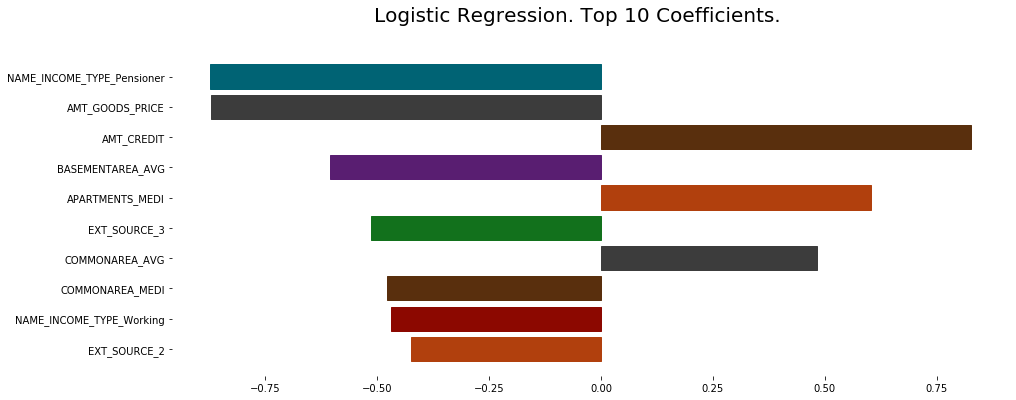

In [62]:
#Features of importance (LogisticRegression)

plt.figure(figsize=(15,6))
logistic_reg_coeff = trained_models[1]["model"].coef_
color_list = sns.color_palette("dark", np.shape(X_train)[1]) 
top_x = 10
logistic_reg_coeff = trained_models[1]["model"].coef_[0]
idx = np.argsort(np.abs(logistic_reg_coeff))[::-1] 
lreg_ax = plt.barh(app_train.drop(['TARGET'], axis = 1).columns[idx[:top_x]][::-1], logistic_reg_coeff[idx[:top_x]][::-1])
for i,bar in enumerate(lreg_ax):
    bar.set_color(color_list[idx[:top_x][::-1][i]])
    plt.box(False) 
lr_title = plt.suptitle("Logistic Regression. Top " + str(top_x) + " Coefficients.", fontsize=20, fontweight="normal")


Text(0.5, 0.98, 'Feature Importance for Tree Models. Top 10 Features.')

<Figure size 1080x576 with 0 Axes>

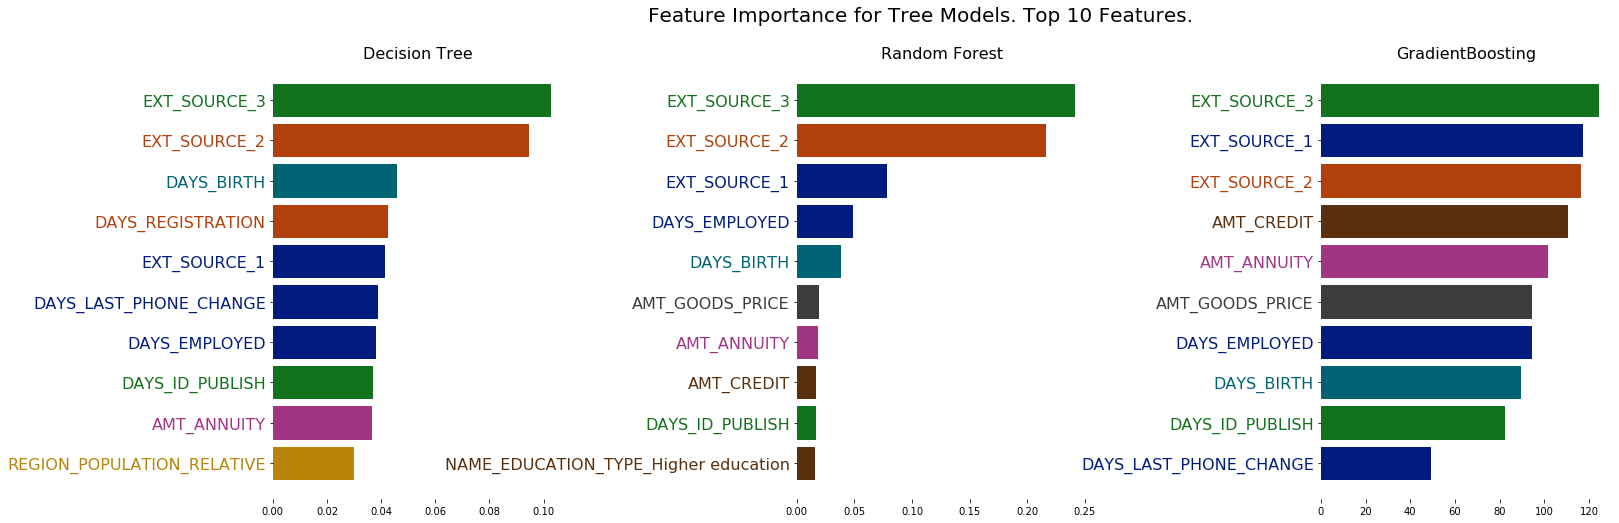

In [63]:
#Features of importance (DecisionTree, RandomForest, GradientBoost) 

# Create array of tree based models and plot feature importance scores
tree_models = []
plt.figure(figsize=(15,8))
color_list =  sns.color_palette("dark", np.shape(X_train)[1]) 
top_x = 10 # number of x most important features to show
for model in trained_models:
    if hasattr(model["model"], 'feature_importances_'):
        tree_models.append({"name":model["name"], "fi": model["model"].feature_importances_}) 

fig, axs = plt.subplots(1,3, figsize=(24, 8), facecolor='w', edgecolor='k')
fig.subplots_adjust(hspace = 0.5, wspace=0.8)
axs = axs.ravel()

for i in range(len(tree_models)):
    feature_importance = tree_models[i]["fi"]
    indices = np.argsort(feature_importance)
    indices = indices[-top_x:]
    
    bars = axs[i].barh(range(len(indices)), feature_importance[indices], color='b', align='center') 
    axs[i].set_title( tree_models[i]["name"], fontweight="normal", fontsize=16)
    
    plt.sca(axs[i])
    plt.yticks(range(len(indices)), [app_train.drop(['TARGET'], axis = 1).columns[j] for j in indices], 
               fontweight="normal", fontsize=16) 
    
    # print(len(plt.gca().get_yticklabels()), len(indices))
    for i, ticklabel in enumerate(plt.gca().get_yticklabels()):
        ticklabel.set_color(color_list[indices[i]])
    
    for i,bar in enumerate(bars):
        bar.set_color(color_list[indices[i]])
    plt.box(False)
    
plt.suptitle("Feature Importance for Tree Models. Top " + str(top_x) + " Features.", fontsize=20, fontweight="normal")

# Retrain du modèle final sur toutes la base d'entrainement

In [64]:
#On reprend l'imputation

imp_mean = SimpleImputer(strategy='median')
imp_mean.fit_transform(X)

index_X = X.index
X = pd.DataFrame(imp_mean.transform(X), columns=features, index=index_X)

# Centrage & réduction des data
X_full_train = preprocessing.StandardScaler().fit_transform(X)

model = gb
model = model.fit(X_full_train,y)

# Sauvegarde du modèle

In [65]:
# Save the models as pickle files
import joblib
joblib.dump(model, "model_gb.pkl".format())

['model_gb.pkl']

# Optimisation du seuil de prédiction grâce à une fonction métier 

0.7076362900778802

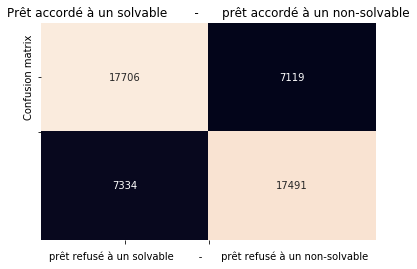

In [66]:
#matrix confusion
from sklearn import metrics

y_pred = model.predict(X_full_train)
conf_mat = metrics.confusion_matrix(y, y_pred)

sns.heatmap(conf_mat, annot=True, fmt='.0f', cbar=False)
plt.xticks([0.5,1], ["",""])
plt.yticks([0.5,1], ["Confusion matrix",""])
plt.xlabel('prêt refusé à un solvable        -      prêt refusé à un non-solvable')
plt.title('Prêt accordé à un solvable       -      prêt accordé à un non-solvable')


f_score=  metrics.f1_score(y, y_pred)
f_score

In [67]:
df_eval = X

df_eval['TARGET']=y
df_eval['prediction'] = y_pred

df_eval0 = df_eval[df_eval['TARGET']==0]
df_eval1= df_eval[df_eval['TARGET']==1]

df_FN = df_eval0[df_eval0['prediction']==1]
df_FP = df_eval1[df_eval1 ['prediction']==0]

print(len(df_FP), len(df_FN))

7334 7119


<BarContainer object of 2 artists>

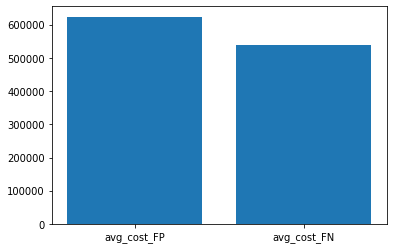

In [68]:
avg_cost_fp = df_FP['AMT_CREDIT'].sum()/len(df_FP)
avg_cost_fn = df_FN['AMT_CREDIT'].sum()/len(df_FN) 

axis_x = ["avg_cost_FP", "avg_cost_FN"]
axis_y = [avg_cost_fp, avg_cost_fn]

plt.bar(axis_x, axis_y)

In [69]:
print("En moyenne, accorder à tort un crédit coûte", round(avg_cost_fp/avg_cost_fn, 2) , "fois plus que refuser un crédit à tort")

En moyenne, accorder à tort un crédit coûte 1.16 fois plus que refuser un crédit à tort


In [70]:
#On doit donc réhausser le seuil pour refuser plus facilement un crédit

In [71]:
from hyperopt import hp, fmin, tpe, rand, space_eval

search_space = [hp.uniform('x',0,1)]


def fonction_loss(threshold):
    df_eval = X
    y_pred = (model.predict_proba(X_full_train)[:,1] >= threshold).astype(bool)
    
    df_eval['TARGET']=y
    df_eval['prediction'] = y_pred
    
    df_eval0 = df_eval[df_eval['TARGET']==0]
    df_eval1= df_eval[df_eval['TARGET']==1]
    
    df_FN = df_eval0[df_eval0['prediction']==1]
    df_FP = df_eval1[df_eval1 ['prediction']==0]
    
    cost_fp = df_FP['AMT_CREDIT'].sum()
    cost_fn = df_FN['AMT_CREDIT'].sum()
    
    score_model = cost_fn + cost_fp*1.14
    return score_model

best = fmin(fonction_loss, search_space, algo = tpe.suggest, max_evals = 100)
print('seuil optimal', best)

100%|███████████████████████████████████████████████| 100/100 [00:35<00:00,  2.80trial/s, best loss: 8981622950.849998]
seuil optimal {'x': 0.480333705362083}


In [72]:
#Lors du  déploiement du modèle on passera donc le seuil de 0,5 à 0,47